In [4]:
# based on https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/reset/backend_reset
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import IBMQ, QuantumCircuit, execute, assemble, schedule, transpile
from qiskit.providers.ibmq.job import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import  plot_gate_map
from qiskit import Aer

In [7]:
backend=Aer.get_backend('qasm_simulator')
print('\nmy backend=',backend)


my backend= qasm_simulator


In [69]:
def my_circ(n_resets):
    """Multi-qubit circuit  with ``n_resets`` reset instructions """
    nq=3
    qc = QuantumCircuit(nq, nq)
    qc.h(0)
    #qc.reset([0]*n_resets)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.reset([2]*n_resets)
    qc.barrier()
    qc.measure(range(nq), range(nq))
    return qc

In [70]:
circL = [my_circ(0),my_circ(1),my_circ(3)]
job = execute(circL, backend,shots=1000) 
jid=job.job_id()
print('run on %s job %s ...'%(backend,jid))
job_monitor(job)

run on qasm_simulator job d2924a41-7b7c-4186-ab2b-060b0736ec8d ...
Job Status: job has successfully run


In [71]:
print(circL[0]);print(circL[1]) 

     ┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2 
     ┌───┐                ░ ┌─┐      
q_0: ┤ H ├──■────■────────░─┤M├──────
     └───┘┌─┴─┐  │        ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼────────░──╫─┤M├───
          └───┘┌─┴─┐      ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─|0>──░──╫──╫─┤M├
               └───┘      ░  ║  ║ └╥┘
c: 3/════════════════════════╩══╩══╩═
                             0  1  2 


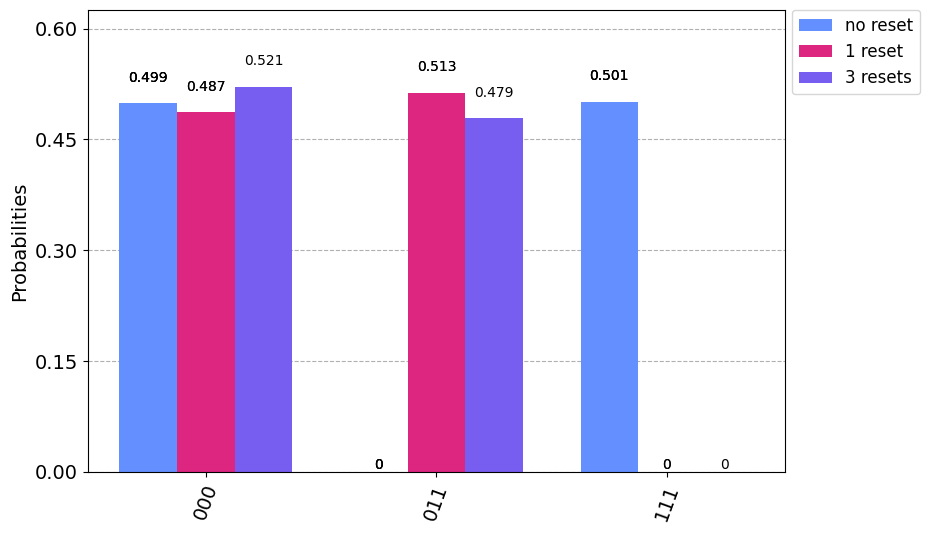

In [75]:
counts1 = job.result().get_counts()
qcLeg = ['no reset', '1 reset', '3 resets']
plot_histogram(counts1, legend=qcLeg, figsize=(9, 6))

In [74]:
(counts1[0],counts1[1])  # MSBF order

({'000': 499, '111': 501}, {'000': 487, '011': 513})